In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import plotly.graph_objects as go
from scipy.signal import find_peaks, savgol_filter
from scipy.stats import pearsonr

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from tools.analysis import *
from tools.outliers import MonteCarloOutliers
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import cross_val_predict, train_test_split
from sklearn.utils import shuffle

In [3]:
domain = pd.read_csv('data/domain.csv')
df = pd.read_csv('data/dataset.csv')
X = df.drop(columns=['HbA1c', 'years'])
y = df['HbA1c']
years = df['years']

X.columns = np.ravel(domain)

In [4]:
X = df.drop(columns=['HbA1c', 'years'])
y = df['HbA1c']
X.columns = np.ravel(domain)
X

,400.1635,400.6456,401.1277,401.6098,402.0919,402.5741,403.0562,403.5383,404.0204,404.5026,...,3995.8490,3996.3310,3996.8130,3997.2950,3997.7770,3998.2590,3998.7410,3999.2240,3999.7060,4000.1880
0,0.218005,0.219062,0.221151,0.223613,0.225833,0.227473,0.228559,0.229367,0.230196,0.231184,...,0.009078,0.009078,0.009077,0.009074,0.009070,0.009066,0.009061,0.009055,0.009048,0.009040
1,0.235756,0.237171,0.238089,0.237939,0.236417,0.233711,0.230487,0.227615,0.225840,0.225530,...,0.009709,0.009708,0.009705,0.009699,0.009691,0.009680,0.009668,0.009657,0.009649,0.009646
2,0.261524,0.264529,0.267711,0.270232,0.271406,0.271031,0.269475,0.267460,0.265697,0.264599,...,0.007980,0.007985,0.007995,0.008008,0.008024,0.008040,0.008058,0.008075,0.008092,0.008107
3,0.274799,0.278454,0.282762,0.286734,0.289707,0.291557,0.292687,0.293748,0.295275,0.297400,...,0.007575,0.007600,0.007627,0.007653,0.007674,0.007688,0.007694,0.007692,0.007685,0.007673
4,0.223600,0.225310,0.227360,0.229167,0.230353,0.230925,0.231297,0.232071,0.233744,0.236466,...,0.010037,0.010029,0.010025,0.010028,0.010034,0.010041,0.010048,0.010051,0.010052,0.010049
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
446,0.253261,0.254469,0.255437,0.255796,0.255311,0.254114,0.252725,0.251827,0.251964,0.253304,...,0.012096,0.012106,0.012107,0.012100,0.012086,0.012068,0.012050,0.012036,0.012028,0.012027
448,0.352318,0.352299,0.353075,0.353827,0.353893,0.353158,0.352134,0.351675,0.352509,0.354873,...,0.008853,0.008796,0.008742,0.008701,0.008674,0.008662,0.008658,0.008657,0.008654,0.008645
449,0.224357,0.223553,0.223732,0.224696,0.226143,0.227831,0.229672,0.231706,0.233981,0.236420,...,0.006502,0.006461,0.006417,0.006378,0.006347,0.006329,0.006321,0.006323,0.006330,0.006340
451,0.332913,0.333179,0.334629,0.336291,0.337391,0.337680,0.337502,0.337541,0.338393,0.340228,...,0.011321,0.011328,0.011328,0.011320,0.011305,0.011282,0.011256,0.011230,0.011207,0.011190


In [5]:
#2340 2573

In [6]:
def corr_plot(X, y):
    r, p_val = pearsonr(X, y)
    
    model = LinearRegression()
    model.fit(X.reshape(-1, 1), y)
    
    x_range = np.linspace(min(X), max(X))
    predicted = model.predict(x_range.reshape(-1, 1))
    
    if p_val < 0.00001:
        text = f"$R = {r:.3f}$\n$p < 0.00001$\n$y = {model.coef_[0]:.5f}x + {model.intercept_:.5f}$"
    else:
        text = f"$R = {r:.3f}$\n$p = {p_val:.5f}$\n$y = {model.coef_[0]:.5f}x + {model.intercept_:.5f}$"
        
    plt.scatter(X, y, facecolor='w', edgecolor='k')
    plt.plot(x_range, predicted, color='r', linewidth=1.5)
    plt.xlabel("$y_1$")
    plt.ylabel("$y_2$")

    x_offset = (max(X) - min(X)) * 0.02
    y_offset = (max(y) - min(y)) * 0.02
    text_x = min(X)
    text_y = max(y)

    print(text)
    
    plt.text(text_x, text_y, text, verticalalignment='top')

In [7]:
#df = df[df['HbA1c'] < 10]
max_abs = df.drop(columns=['HbA1c', 'years']).apply(lambda row: True if row.max() > 0.3 else False, axis=1)
df = df[max_abs]
#df = df[df['HbA1c'] < 10]
print(len(df))

X = df.drop(columns=['HbA1c', 'years'])
y = df['HbA1c']
years = df['years']
X.columns = np.ravel(domain)

#X = X.apply(lambda row: row / max(row.iloc[2000:]), axis=1)
X = X.T.apply(lambda col: savgol_filter(col, window_length=60, polyorder=2, deriv=2)).T # 60 window 0.3 abs
X_norm = X.apply(lambda row: row / np.linalg.norm(row), axis=1)

294


In [8]:
# X_norm.T.plot(legend=False)
# plt.xlim([1000, 1400])
# plt.ylim([-0.10, 0.10])
# plt.fill_betweenx(plt.ylim(), 1075, 1085, alpha=0.5, color='skyblue')
# plt.fill_betweenx(plt.ylim(), 1290, 1320, alpha=0.5, color='skyblue')

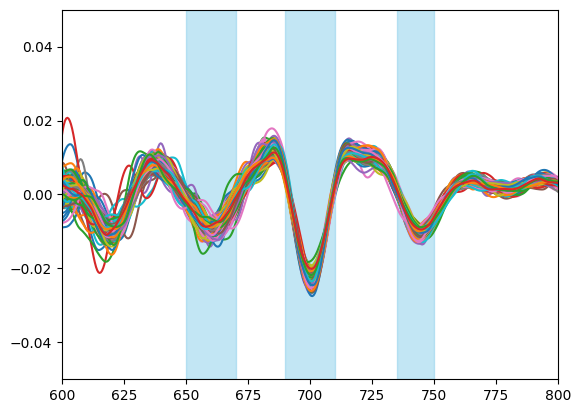

In [9]:
X_norm.T.plot(legend=False)
plt.xlim([600, 800])
plt.ylim([-0.05, 0.05])
plt.fill_betweenx(plt.ylim(), 650, 670, alpha=0.5, color='skyblue')
plt.fill_betweenx(plt.ylim(), 690, 710, alpha=0.5, color='skyblue')
plt.fill_betweenx(plt.ylim(), 735, 750, alpha=0.5, color='skyblue')

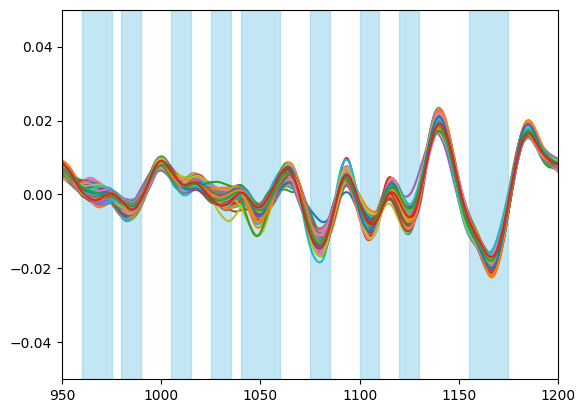

In [10]:
X_norm.T.plot(legend=False)
plt.xlim([950, 1200])
plt.ylim([-0.05, 0.05])
plt.fill_betweenx(plt.ylim(), 960, 975, alpha=0.5, color='skyblue') # 970
plt.fill_betweenx(plt.ylim(), 980, 990, alpha=0.5, color='skyblue') # 985
plt.fill_betweenx(plt.ylim(), 1005, 1015, alpha=0.5, color='skyblue') # 1030
plt.fill_betweenx(plt.ylim(), 1025, 1035, alpha=0.5, color='skyblue') # 1030
plt.fill_betweenx(plt.ylim(), 1040, 1060, alpha=0.5, color='skyblue') # 1050
plt.fill_betweenx(plt.ylim(), 1075, 1085, alpha=0.5, color='skyblue') # 1080
plt.fill_betweenx(plt.ylim(), 1120, 1130, alpha=0.5, color='skyblue') # 1125
plt.fill_betweenx(plt.ylim(), 1100, 1110, alpha=0.5, color='skyblue') # 1115
plt.fill_betweenx(plt.ylim(), 1155, 1175, alpha=0.5, color='skyblue') # 1160

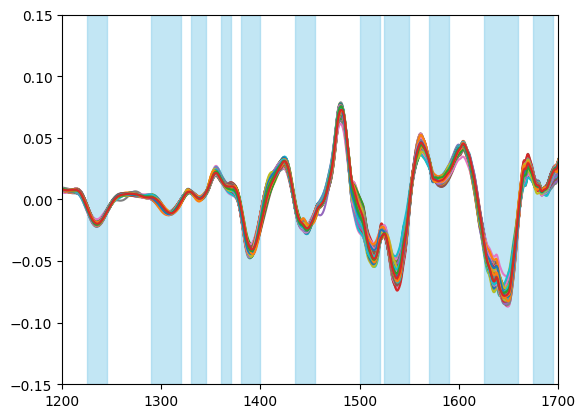

In [11]:
X_norm.T.plot(legend=False)
plt.xlim([1200, 1700])
plt.ylim([-0.15, 0.15])
plt.fill_betweenx(plt.ylim(), 1225, 1245, alpha=0.5, color='skyblue') # 1235
plt.fill_betweenx(plt.ylim(), 1290, 1320, alpha=0.5, color='skyblue') # 1300
plt.fill_betweenx(plt.ylim(), 1330, 1345, alpha=0.5, color='skyblue') # 1335
plt.fill_betweenx(plt.ylim(), 1360, 1370, alpha=0.5, color='skyblue') # 1365
plt.fill_betweenx(plt.ylim(), 1380, 1400, alpha=0.5, color='skyblue') # 1390
plt.fill_betweenx(plt.ylim(), 1435, 1455, alpha=0.5, color='skyblue') # 1440
plt.fill_betweenx(plt.ylim(), 1500, 1520, alpha=0.5, color='skyblue') # 1510
plt.fill_betweenx(plt.ylim(), 1525, 1550, alpha=0.5, color='skyblue') # amide 2
plt.fill_betweenx(plt.ylim(), 1570, 1590, alpha=0.5, color='skyblue') # 1580
plt.fill_betweenx(plt.ylim(), 1625, 1660, alpha=0.5, color='skyblue') # amide 1
plt.fill_betweenx(plt.ylim(), 1675, 1695, alpha=0.5, color='skyblue') # 1680

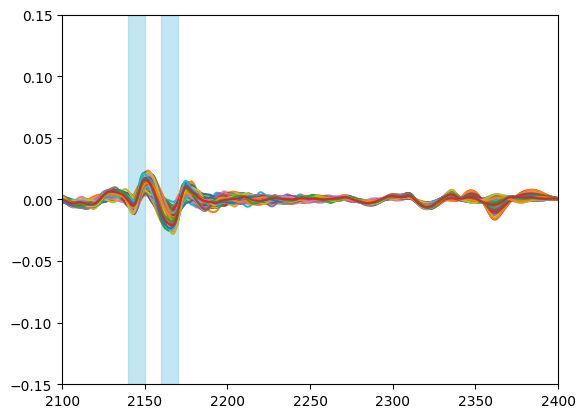

In [12]:
X_norm.T.plot(legend=False)
plt.xlim([2100, 2400])
plt.ylim([-0.15, 0.15])
plt.fill_betweenx(plt.ylim(), 2140, 2150, alpha=0.5, color='skyblue') # 2140
plt.fill_betweenx(plt.ylim(), 2160, 2170, alpha=0.5, color='skyblue') # 2160

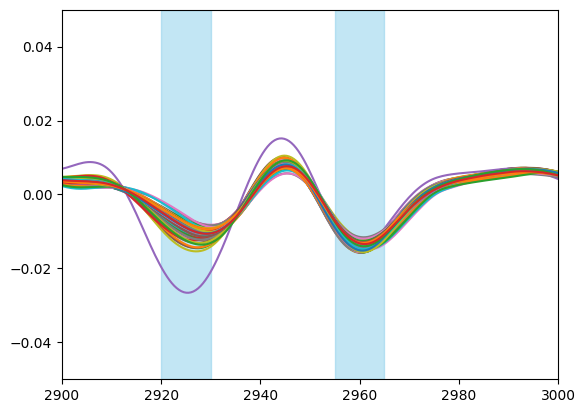

In [13]:
X_norm.T.plot(legend=False)
plt.xlim([2900, 3000])
plt.ylim([-0.05, 0.05])
plt.fill_betweenx(plt.ylim(), 2920, 2930, alpha=0.5, color='skyblue')
plt.fill_betweenx(plt.ylim(), 2955, 2965, alpha=0.5, color='skyblue')

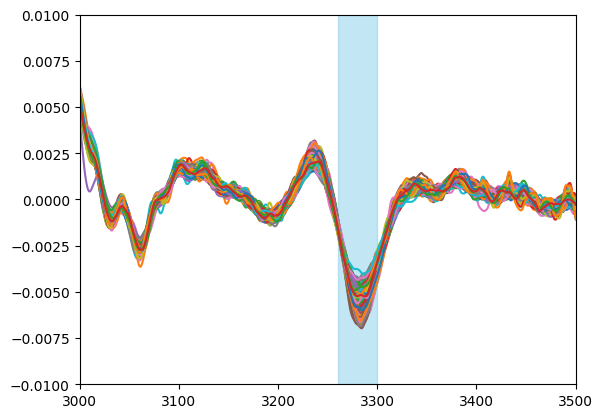

In [14]:
X_norm.T.plot(legend=False)
plt.xlim([3000, 3500])
plt.ylim([-0.01, 0.01])
plt.fill_betweenx(plt.ylim(), 3260, 3300, alpha=0.5, color='skyblue') # 3290

In [15]:
amide_2 = X.iloc[:, (X.columns > 1525) & (X.columns < 1560)].min(axis=1) # Alone is not significant
amide_1 = X.iloc[:, (X.columns > 1625) & (X.columns < 1660)].min(axis=1) # p = 0.003 # amide_1 / amide_2 -> p = 0.00002
peak_660 = X.iloc[:, (X.columns > 650) & (X.columns < 670)].min(axis=1) # NS
peak_700 = X.iloc[:, (X.columns > 690) & (X.columns < 710)].min(axis=1) # NS
peak_740 = X.iloc[:, (X.columns > 735) & (X.columns < 750)].min(axis=1) # NS
peak_970 = X.iloc[:, (X.columns > 960) & (X.columns < 975)].min(axis=1) 
peak_1030 = X.iloc[:, (X.columns > 1025) & (X.columns < 1035)].min(axis=1) # p < 0.00001
peak_1050 = X.iloc[:, (X.columns > 1040) & (X.columns < 1060)].min(axis=1) # NS
peak_1080 = X.iloc[:, (X.columns > 1075) & (X.columns < 1085)].min(axis=1) # p < 0.00001
peak_1115 = X.iloc[:, (X.columns > 1100) & (X.columns < 1110)].min(axis=1) # p < 0.00001
peak_1125 = X.iloc[:, (X.columns > 1120) & (X.columns < 1130)].min(axis=1) # p < 0.00001
peak_1160 = X.iloc[:, (X.columns > 1155) & (X.columns < 1165)].min(axis=1) # p < 0.00001
peak_1235 = X.iloc[:, (X.columns > 1225) & (X.columns < 1245)].min(axis=1) # p = 0.00009
peak_1300 = X.iloc[:, (X.columns > 1290) & (X.columns < 1320)].min(axis=1) # p = 0.00027
peak_1335 = X.iloc[:, (X.columns > 1330) & (X.columns < 1340)].min(axis=1) # p < 0.00001
peak_1365 = X.iloc[:, (X.columns > 1360) & (X.columns < 1370)].min(axis=1) # p < 0.00001
peak_1390 = X.iloc[:, (X.columns > 1380) & (X.columns < 1400)].min(axis=1) # p = 0.00551
peak_1440 = X.iloc[:, (X.columns > 1435) & (X.columns < 1455)].min(axis=1) # p < 0.00001
peak_1510 = X.iloc[:, (X.columns > 1500) & (X.columns < 1520)].min(axis=1) # p = 0.00328
peak_1580 = X.iloc[:, (X.columns > 1570) & (X.columns < 1590)].min(axis=1) # p < 0.00001
peak_1680 = X.iloc[:, (X.columns > 1675) & (X.columns < 1695)].min(axis=1) # NS
peak_2140 = X.iloc[:, (X.columns > 2140) & (X.columns < 2150)].min(axis=1) #
peak_2160 = X.iloc[:, (X.columns > 2160) & (X.columns < 2170)].min(axis=1) # p < 0.00001
peak_2920 = X.iloc[:, (X.columns > 2920) & (X.columns < 2930)].min(axis=1) # p = 0.00023
peak_2960 = X.iloc[:, (X.columns > 2955) & (X.columns < 2965)].min(axis=1) # p < 0.00001'
peak_3290 = X.iloc[:, (X.columns > 3260) & (X.columns < 3300)].min(axis=1)

lower_1480 = X.iloc[:, (X.columns > 1470) & (X.columns < 1490)].max(axis=1)

variables_list = [
    amide_2,
    amide_1,
    peak_1030,
    peak_1050,
    peak_1080,
    peak_1115,
    peak_1125,
    peak_1160,
    peak_1235,
    peak_1300,
    peak_1335,
    peak_1365,
    peak_1390,
    peak_1440,
    peak_1510,
    peak_1580,
    peak_2160,
    peak_2920,
    peak_2960
]

variable_names = [
    'amide_2',
    'amide_1',
    'peak_1030',
    'peak_1050',
    'peak_1080',
    'peak_1115',
    'peak_1125',
    'peak_1160',
    'peak_1235',
    'peak_1300',
    'peak_1335',
    'peak_1365',
    'peak_1390',
    'peak_1440',
    'peak_1510',
    'peak_1580',
    'peak_2160',
    'peak_2920',
    'peak_2960'
]

$R = -0.003$
$p = 0.95251$
$y = -0.00000x + -0.00009$


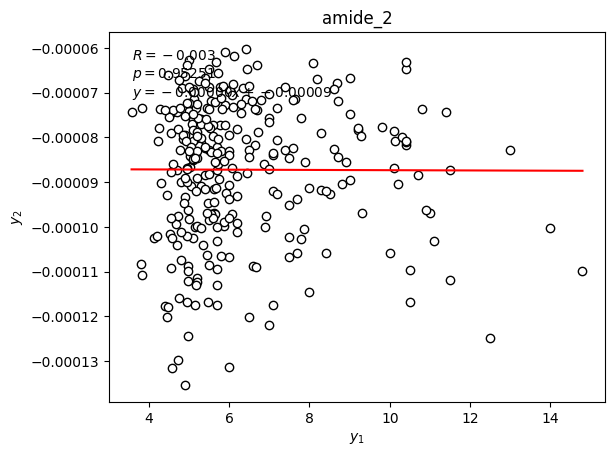

$R = -0.110$
$p = 0.05879$
$y = -0.00000x + -0.00011$


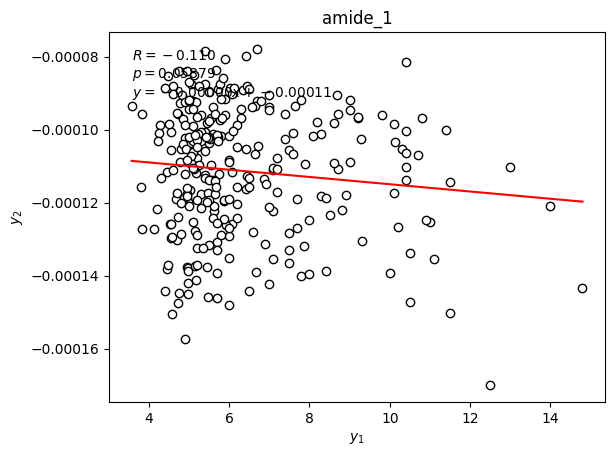

$R = -0.300$
$p < 0.00001$
$y = -0.00000x + 0.00000$


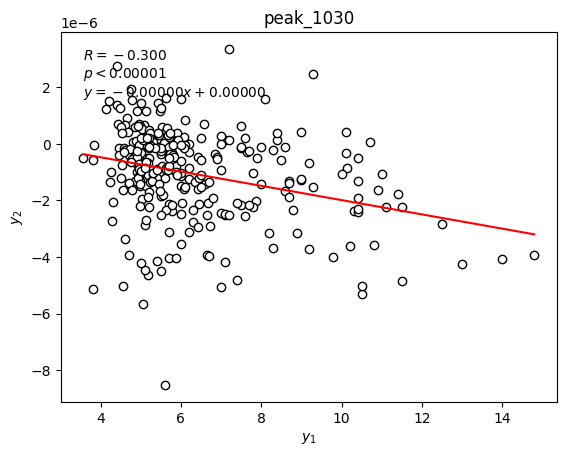

$R = 0.080$
$p = 0.16942$
$y = 0.00000x + -0.00001$


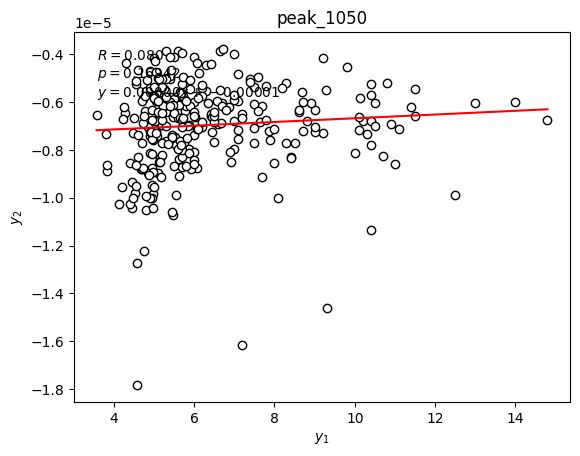

$R = -0.592$
$p < 0.00001$
$y = -0.00000x + -0.00001$


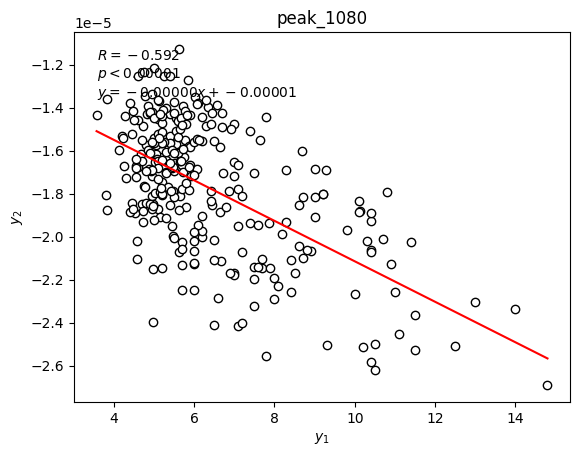

$R = -0.527$
$p < 0.00001$
$y = -0.00000x + -0.00001$


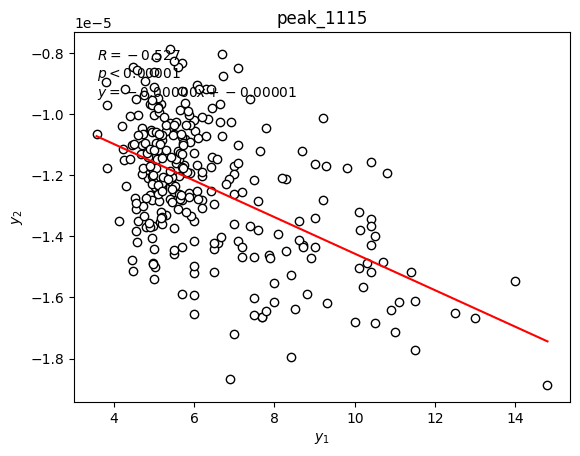

$R = 0.403$
$p < 0.00001$
$y = 0.00000x + -0.00001$


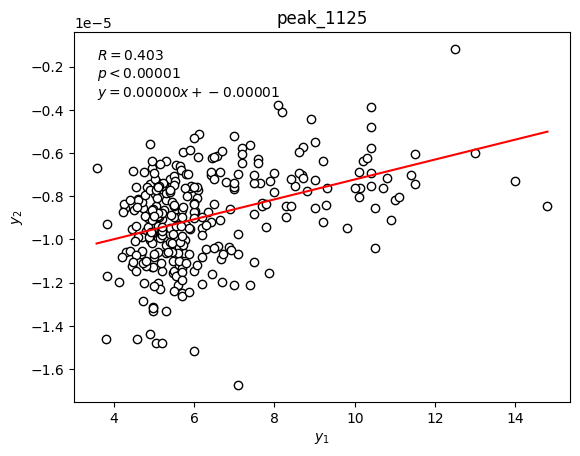

$R = -0.016$
$p = 0.78585$
$y = -0.00000x + -0.00003$


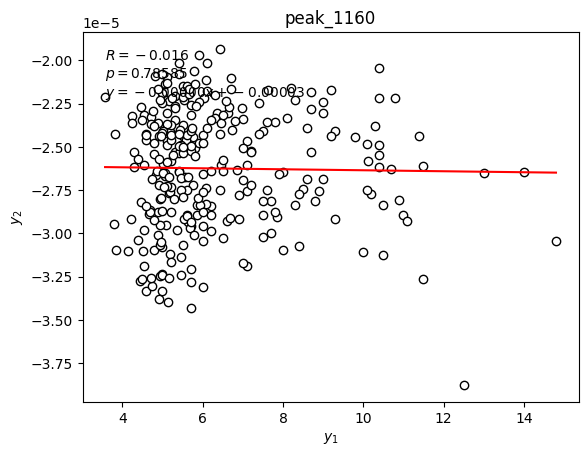

$R = -0.082$
$p = 0.16052$
$y = -0.00000x + -0.00003$


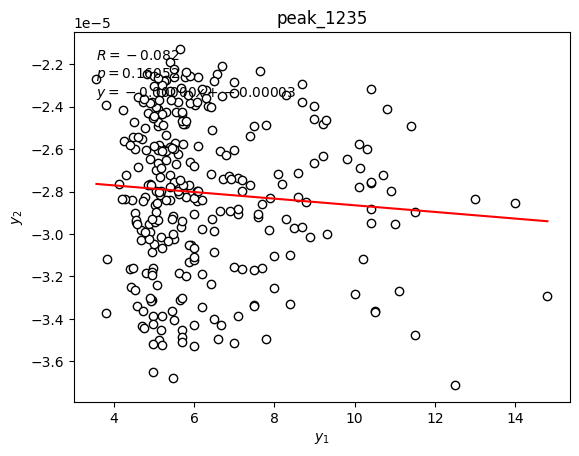

$R = -0.098$
$p = 0.09243$
$y = -0.00000x + -0.00002$


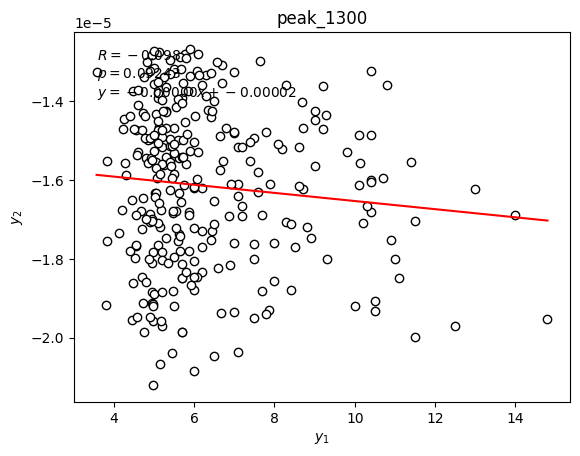

$R = -0.214$
$p = 0.00022$
$y = -0.00000x + 0.00000$


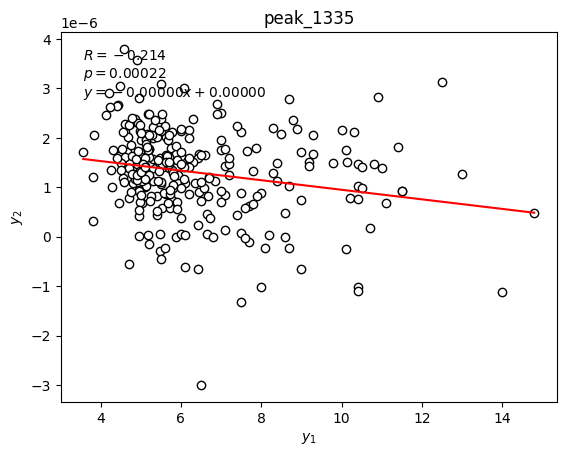

$R = -0.336$
$p < 0.00001$
$y = -0.00000x + 0.00002$


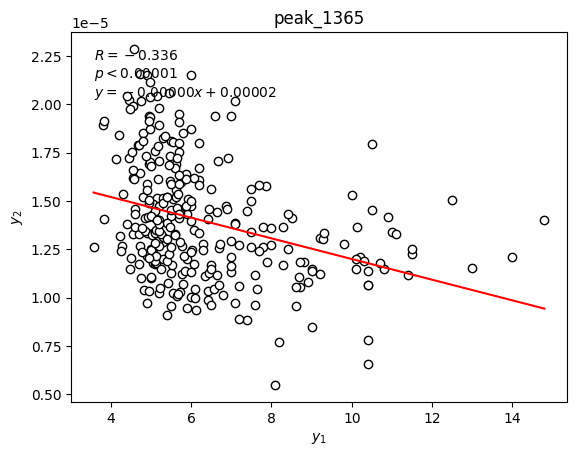

$R = -0.127$
$p = 0.02984$
$y = -0.00000x + -0.00006$


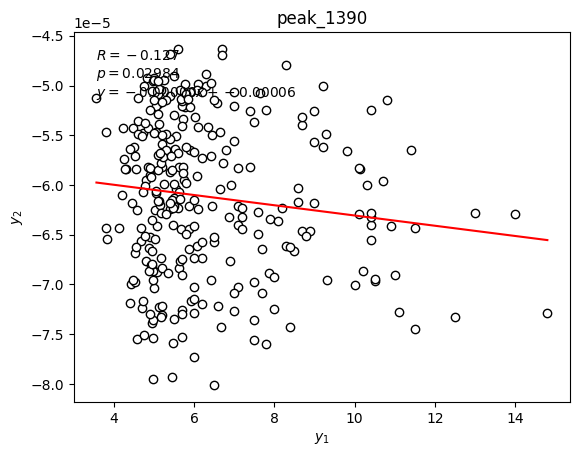

$R = 0.071$
$p = 0.22163$
$y = 0.00000x + -0.00004$


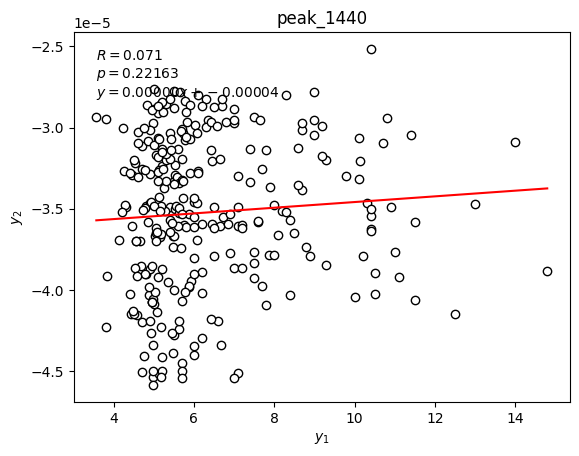

$R = -0.117$
$p = 0.04443$
$y = -0.00000x + -0.00006$


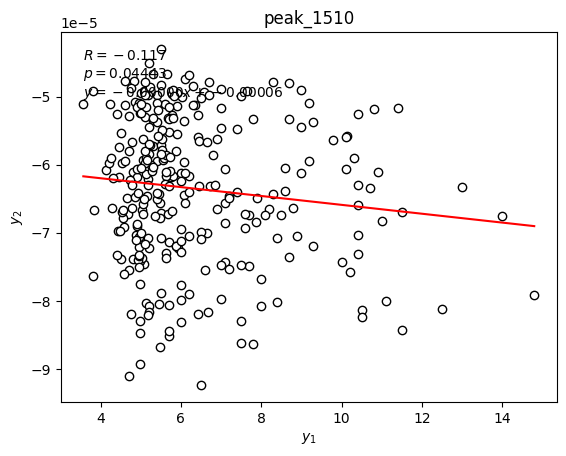

$R = 0.154$
$p = 0.00814$
$y = 0.00000x + 0.00002$


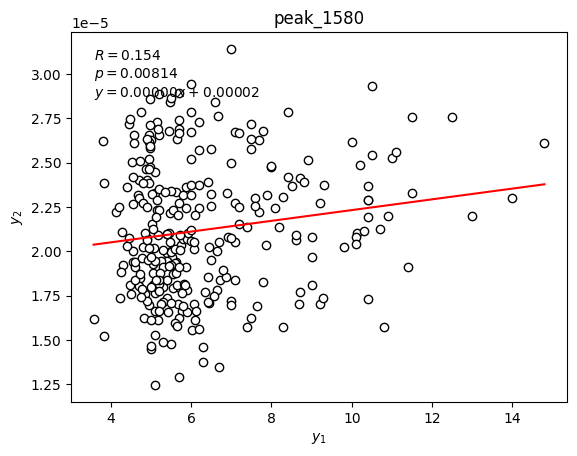

$R = -0.460$
$p < 0.00001$
$y = -0.00000x + -0.00001$


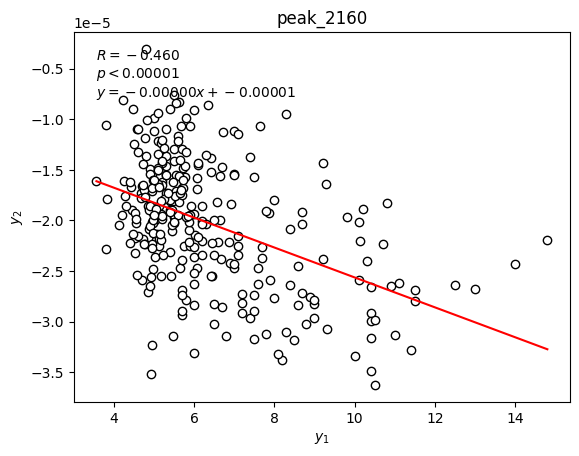

$R = -0.268$
$p < 0.00001$
$y = -0.00000x + -0.00001$


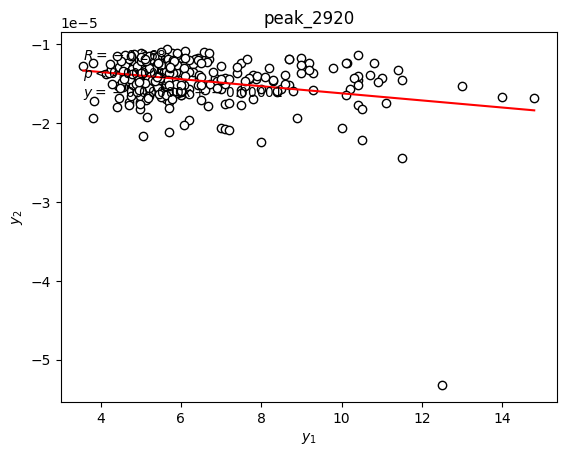

$R = -0.103$
$p = 0.07652$
$y = -0.00000x + -0.00002$


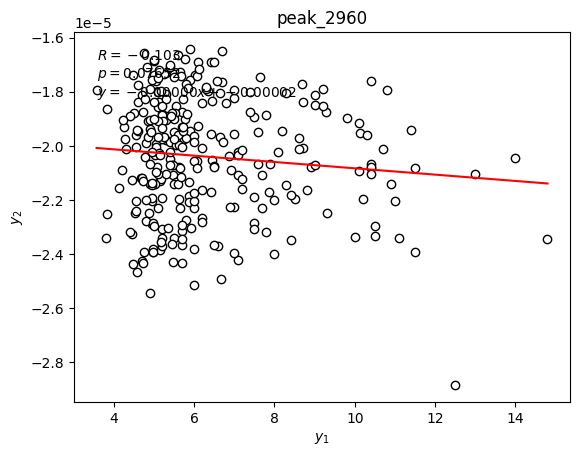

In [16]:
for name, peak in zip(variable_names, variables_list):
    corr_plot(y.to_numpy(), peak)
    plt.title(name)
    plt.show()

$R = 0.592$
$p < 0.00001$
$y = 0.00000x + 0.00001$


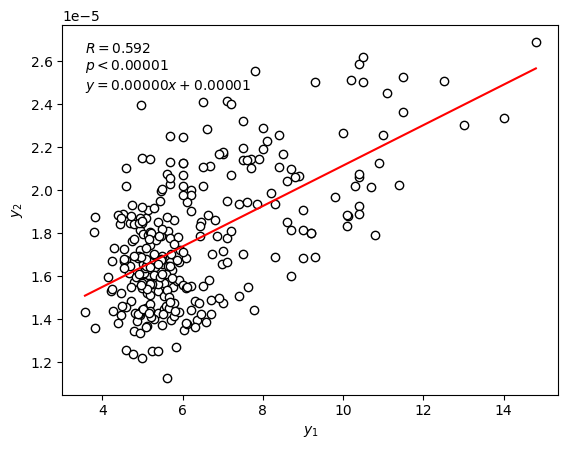

In [17]:
"""
1170–1179
=========
C–H in-plane bending mode of tyrosine, 
C–O ester stretch: cholesterol esters,++stretching (pyr. half-ring) 
asymmetric, C–C, phospholipids, HbO2
"""
corr_plot(y.to_numpy(), -peak_1080.to_numpy())

$R = 0.336$
$p < 0.00001$
$y = 0.00000x + -0.00002$


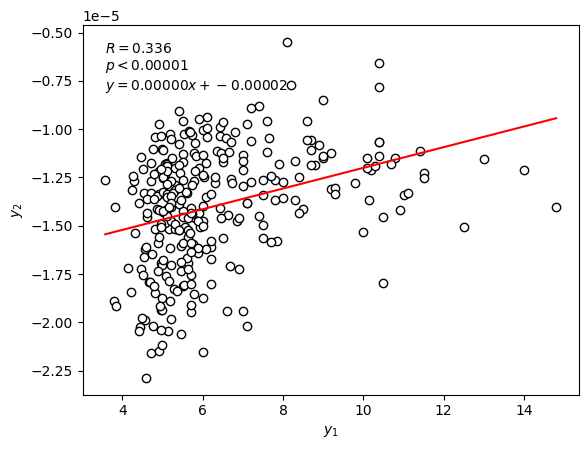

In [18]:
corr_plot(y.to_numpy(), -peak_1365.to_numpy())

0.5355015681869065


Text(3.57, 14.8, '$R^2 = 0.74$\n$R = 0.86$\nRMSE = $0.97$')

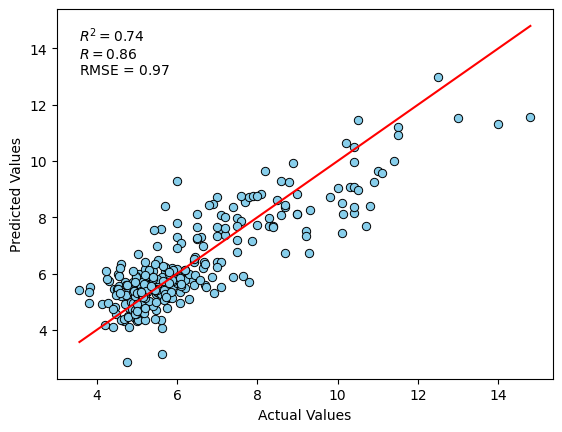

In [19]:
model = LinearRegression()
X_peaks = np.stack(variables_list, axis=1)

#X_peaks = np.stack((peak_1080, peak_2960), axis=1)

y_cv = cross_val_predict(model, X_peaks, y, cv=5)

model.fit(X_peaks, y)

print(r2_score(y_cv, y))

y_pred = model.predict(X_peaks)

r_squared = r2_score(y, y_pred)
r = pearsonr(y, y_pred)[0]
rmse = np.sqrt(mean_squared_error(y, y_pred))

plt.scatter(y, y_pred, facecolor='skyblue', edgecolor='k', linewidths=0.7)
plt.plot([min(y), max(y)], [min(y), max(y)], color='red')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

plt.text(min(y), max(y), f'$R^2 = {r_squared:.2f}$\n$R = {r:.2f}$\nRMSE = ${rmse:.2f}$', verticalalignment='top')

┌───────────────────────────┐
│        FIT RESULTS        │
├───────────────────────────┤
│ RMSE = 1.0854             │
│ R2 = 0.6726               │
│ R = 0.8223                │
│ Number of components = 10 │
└───────────────────────────┘


(<Figure size 1000x800 with 4 Axes>,
 array([[<Axes: xlabel='Num of components', ylabel='$R^2$'>,
         <Axes: xlabel='Num of components', ylabel='RMSE'>],
        [<Axes: xlabel='y true', ylabel='y predicted'>,
         <Axes: xlabel='Sample', ylabel='Residuals'>]], dtype=object))

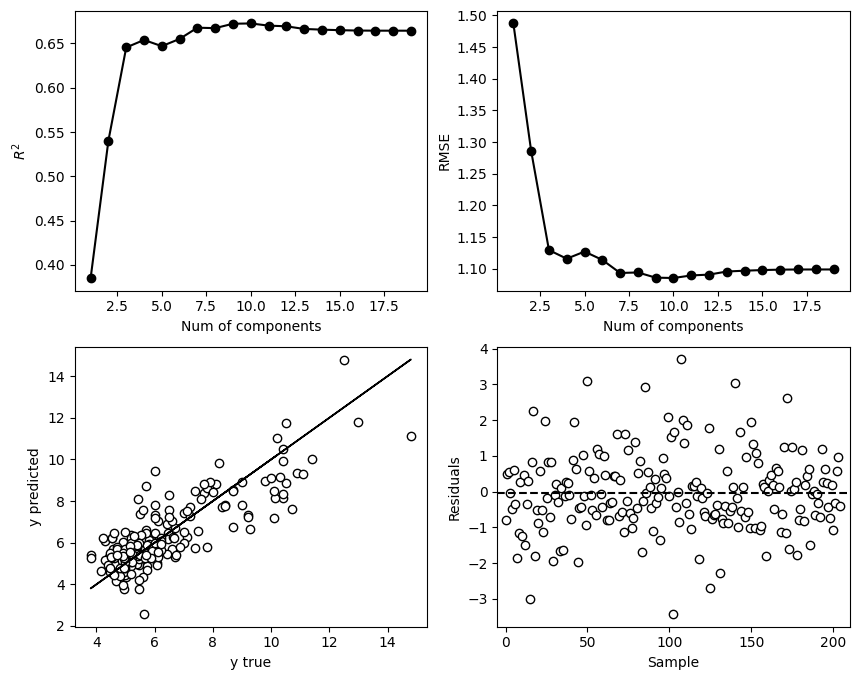

In [20]:
discretizer = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform', subsample=None, random_state=24)
categories = discretizer.fit_transform(y.to_numpy().reshape(-1, 1))


X_train, X_test, y_train, y_test = train_test_split(X_peaks, y, test_size=0.3, stratify=categories, random_state=44)

plot_number_components(X_train, y_train, cv=10)

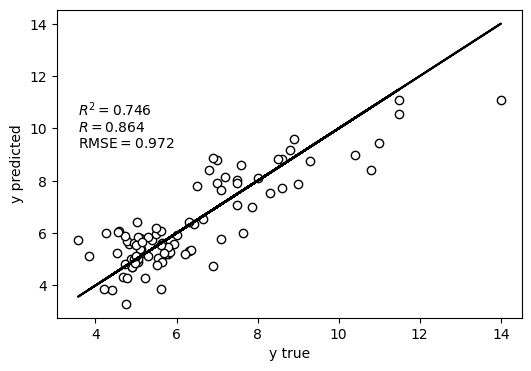

In [21]:
pls = PLSRegression(n_components=5)
pls.fit(X_train, y_train)
y_pred = pls.predict(X_test)
fig, axs = plsr_r2_plot(y_test, y_pred)

In [22]:
amide_2 = X.iloc[:, (X.columns > 1525) & (X.columns < 1560)] # Alone is not significant
amide_1 = X.iloc[:, (X.columns > 1625) & (X.columns < 1660)] # p = 0.003 # amide_1 / amide_2 -> p = 0.00002

peak_660 = X.iloc[:, (X.columns > 650) & (X.columns < 670)] # NS
peak_700 = X.iloc[:, (X.columns > 690) & (X.columns < 710)] # NS
peak_740 = X.iloc[:, (X.columns > 735) & (X.columns < 750)] # NS
peak_970 = X.iloc[:, (X.columns > 960) & (X.columns < 975)]
peak_1030 = X.iloc[:, (X.columns > 1025) & (X.columns < 1035)] # p < 0.00001
peak_1050 = X.iloc[:, (X.columns > 1040) & (X.columns < 1060)] # NS
peak_1080 = X.iloc[:, (X.columns > 1075) & (X.columns < 1085)] # p < 0.00001
peak_1115 = X.iloc[:, (X.columns > 1100) & (X.columns < 1110)] # p < 0.00001
peak_1125 = X.iloc[:, (X.columns > 1120) & (X.columns < 1130)] # p < 0.00001
peak_1160 = X.iloc[:, (X.columns > 1155) & (X.columns < 1165)] # p < 0.00001
peak_1235 = X.iloc[:, (X.columns > 1225) & (X.columns < 1245)] # p = 0.00009
peak_1300 = X.iloc[:, (X.columns > 1290) & (X.columns < 1320)] # p = 0.00027
peak_1335 = X.iloc[:, (X.columns > 1330) & (X.columns < 1340)] # p < 0.00001
peak_1365 = X.iloc[:, (X.columns > 1360) & (X.columns < 1370)] # p < 0.00001
peak_1390 = X.iloc[:, (X.columns > 1380) & (X.columns < 1400)] # p = 0.00551
peak_1440 = X.iloc[:, (X.columns > 1435) & (X.columns < 1455)] # p < 0.00001
peak_1510 = X.iloc[:, (X.columns > 1500) & (X.columns < 1520)] # p = 0.00328
peak_1580 = X.iloc[:, (X.columns > 1570) & (X.columns < 1590)] # p < 0.00001
peak_1680 = X.iloc[:, (X.columns > 1675) & (X.columns < 1695)] # NS
peak_2140 = X.iloc[:, (X.columns > 2140) & (X.columns < 2150)] #
peak_2160 = X.iloc[:, (X.columns > 2160) & (X.columns < 2170)] # p < 0.00001
peak_2920 = X.iloc[:, (X.columns > 2920) & (X.columns < 2930)] # p = 0.00023
peak_2960 = X.iloc[:, (X.columns > 2955) & (X.columns < 2965)] # p < 0.00001'
peak_3290 = X.iloc[:, (X.columns > 3260) & (X.columns < 3300)]


X_peaks = pd.concat( (amide_1, amide_2, peak_1030, peak_1080,
                      peak_1115, peak_1125,
                      peak_1300, peak_1335, peak_1390,
                      peak_1510, peak_2160,
                      peak_3290, peak_2920, peak_2960) , axis=1)

In [23]:
discretizer = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform', subsample=None, random_state=24)
categories = discretizer.fit_transform(y.to_numpy().reshape(-1, 1))


X_train, X_test, y_train, y_test = train_test_split(X_peaks, y, test_size=0.3, stratify=categories, random_state=44)

┌──────────────────────────┐
│       FIT RESULTS        │
├──────────────────────────┤
│ RMSE = 1.0369            │
│ R2 = 0.7012              │
│ R = 0.8411               │
│ Number of components = 9 │
└──────────────────────────┘


(<Figure size 1000x800 with 4 Axes>,
 array([[<Axes: xlabel='Num of components', ylabel='$R^2$'>,
         <Axes: xlabel='Num of components', ylabel='RMSE'>],
        [<Axes: xlabel='y true', ylabel='y predicted'>,
         <Axes: xlabel='Sample', ylabel='Residuals'>]], dtype=object))

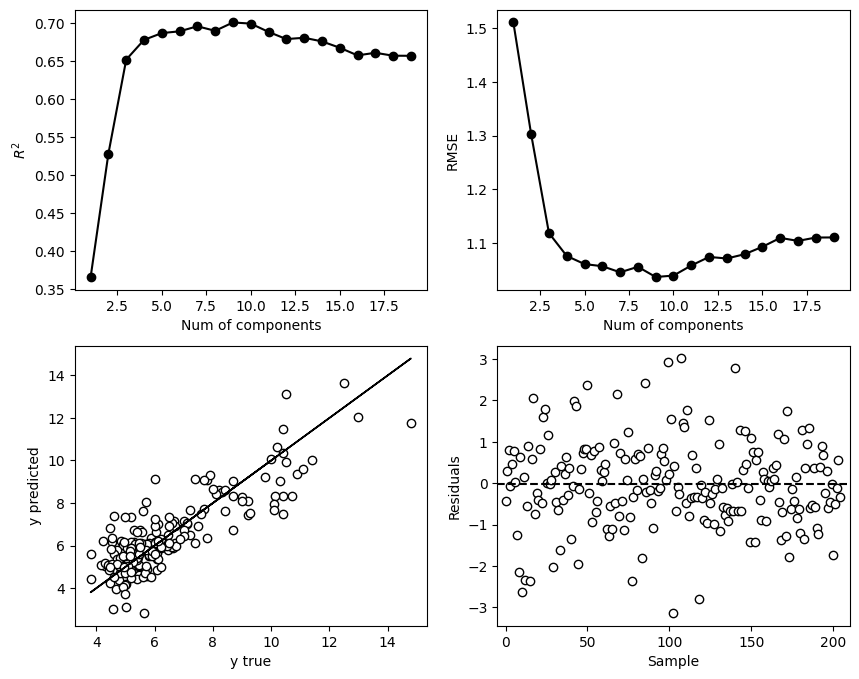

In [24]:
plot_number_components(X_train, y_train, cv=10, number_range=(1, 20))

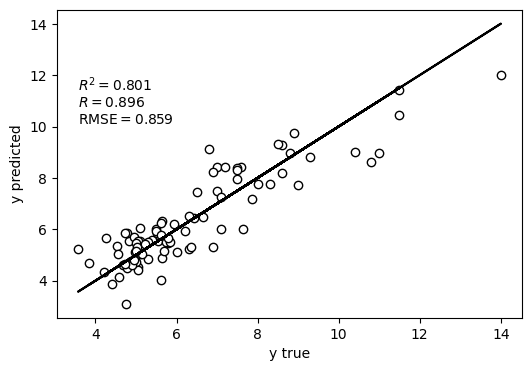

In [25]:
pls = PLSRegression(n_components=7)
pls.fit(X_train, y_train)
y_pred = pls.predict(X_test)
fig, axs = plsr_r2_plot(y_test, y_pred)